In [68]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import cv2

from oiffile import OifFile

In [69]:
class OifImageViewer:
    def __init__(self, oif: OifFile) -> None:
        self.arr = oif.asarray()
        self.img_shape = self.arr.shape[2:]
        self.figsize = (25,25)
        print(self.__str__())

    def show_image(self, ch=0, z=0, color=-1) -> None:
        plt.figure(figsize=self.figsize)
        norm_image = self.normalize(self.arr[ch][z])
        if color > -1:
            color_image = np.zeros((*self.img_shape, 3), dtype=np.uint16)
            color_image[:,:,color] = norm_image
            plt.imshow(color_image)
            return
        plt.imshow(self.BGR2RGB(norm_image))
        
    def combined_image(self, z=0) -> None:
        plt.figure(figsize=self.figsize)
        color_image = np.zeros((*self.img_shape, 3), dtype=np.uint16)
        for n_ch, arr_ch in enumerate(self.arr):
            color_image[:,:,n_ch] = self.normalize(arr_ch[z])
        plt.imshow(color_image)
        
    @staticmethod
    def normalize(image):
        return cv2.normalize(
            image, 
            dst=None, 
            alpha=0, 
            beta=255, 
            norm_type=cv2.NORM_MINMAX
        )
    
    @staticmethod
    def BGR2RGB(image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    def __str__(self):
        return (
            f"Image shape: {self.arr.shape}\n"
            "Axes: CZYX\n"
            f"Dtype: {self.arr.dtype}\n"
        )

Image shape: (2, 80, 4247, 7508)
Axes: CZYX
Dtype: uint16



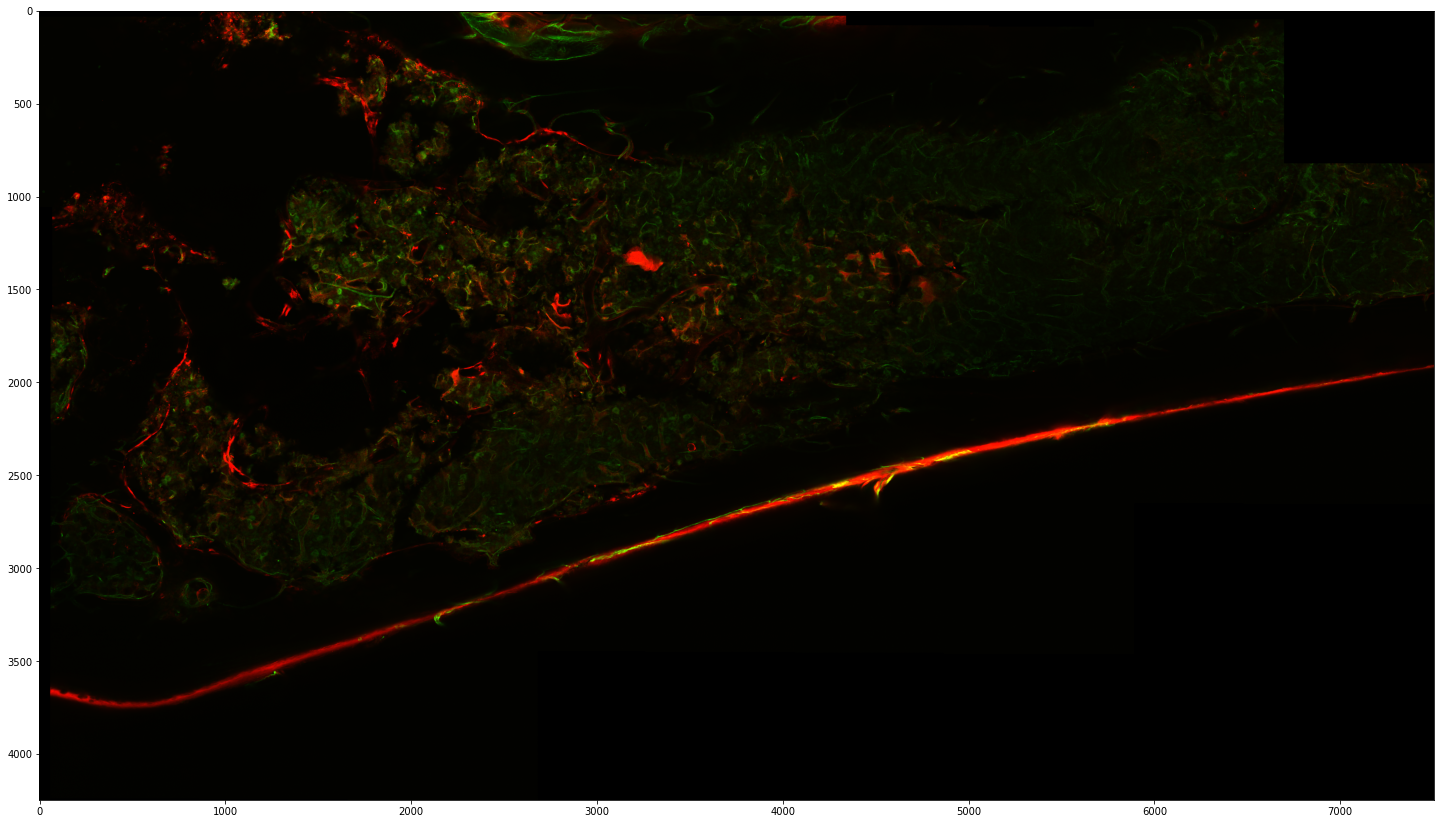

In [70]:
path = "../../data/New_Bone_Project/788_Export_05202022/788_Bone_1_Side_1.oif"

with OifFile(path) as oif:
    viewer = OifImageViewer(oif)
    viewer.combined_image()
